<a href="https://colab.research.google.com/github/gabrielamedeirosds/Analise_de_voos/blob/main/Analise_de_voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando a base de dados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import datetime, warnings, scipy 

from sklearn.model_selection import train_test_split


In [4]:
voos = pd.read_csv('flights.csv')
companhias = pd.read_csv('airlines.csv')

### Descrição das Variáveis 


* **YEAR:** Ano 
* **MONTH:** Mês 
* **DAY:** Dia
* **DAY_OF_WEEK:** Dia da semana
* **AIRLINE:** Airline Identifier
* **FLIGHT_NUMBER:** Flight Identifier
* **TAIL_NUMBER:** Aircraft Identifier
* **ORIGIN_AIRPORT:** Starting Airport
* **DESTINATION_AIRPORT:** Destination Airport
* **SCHEDULED_DEPARTURE :** Planned Departure Time
* **DEPARTURE_TIME:** Real Departure Time (in minutes)
* **DEPARTURE_DELAY:** Departure Delay (in minutes)
* **ARRIVAL_TIME:** Real arrival time 
* **ARRIVAL_DELAY:** Arrival Delay (in minutes)
* **DISTANCE:** distance (miles)





In [5]:
voos.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
voos.shape

(1310399, 31)

##Classificando Voos

In [8]:
#Categorizando voos atrasados e não atrasados

resultado_atraso = []

for i in voos['ARRIVAL_DELAY']:
    
  if i > 10:
    resultado_atraso.append(1)
  else:
    resultado_atraso.append(0) 


In [9]:
#Criando uma coluna para o resultado da checagem de atraso

voos['RESULTADO_ATRASO'] = resultado_atraso

In [10]:
#Numero de voos por companhia aerea

numeros_voos = voos['AIRLINE'].value_counts()

In [11]:
numeros_voos = numeros_voos.rename('VOOS_TOTAIS')
numeros_voos

WN    279067
DL    185872
EV    139315
OO    132900
AA    121295
UA    110331
US     91818
MQ     79905
B6     59795
AS     37063
NK     24466
F9     18291
HA     17373
VX     12908
Name: VOOS_TOTAIS, dtype: int64

In [12]:
companhias = companhias.set_index(['IATA_CODE'], drop=True)
companhias.head()

,AIRLINE
IATA_CODE,
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways


In [13]:
companhias = pd.concat([companhias, numeros_voos], axis=1)
companhias.head()

,AIRLINE,VOOS_TOTAIS
UA,United Air Lines Inc.,110331
AA,American Airlines Inc.,121295
US,US Airways Inc.,91818
F9,Frontier Airlines Inc.,18291
B6,JetBlue Airways,59795


In [14]:
#Numero total de voos não atrasados e atrasados
voos['RESULTADO_ATRASO'].value_counts()

0    991225
1    319174
Name: RESULTADO_ATRASO, dtype: int64

In [15]:
#Variavel que armazena todos os voos atrasados 

voos_atrasados = voos[voos['RESULTADO_ATRASO']==1]

In [16]:
#Variavel que armazena o Numero total de voos atrasados por companhia aerea

voos_companhia = voos_atrasados['AIRLINE'].value_counts()

In [17]:
voos_companhia = voos_companhia.rename('VOOS_ATRASADOS')
voos_companhia

WN    61406
EV    36131
DL    34919
OO    33104
AA    30439
UA    28397
MQ    27187
US    21529
B6    18234
NK     7808
F9     7203
AS     6443
HA     3504
VX     2870
Name: VOOS_ATRASADOS, dtype: int64

In [18]:
companhias = pd.concat([companhias, voos_companhia], axis=1)
companhias.head()

,AIRLINE,VOOS_TOTAIS,VOOS_ATRASADOS
UA,United Air Lines Inc.,110331,28397
AA,American Airlines Inc.,121295,30439
US,US Airways Inc.,91818,21529
F9,Frontier Airlines Inc.,18291,7203
B6,JetBlue Airways,59795,18234


In [19]:
#Relação Numero total de voos de cada companhia por numero total de voos atrasados de cada companhia
companhias['TAXA_ATRASO'] = companhias.apply(lambda row: (row['VOOS_ATRASADOS']/row['VOOS_TOTAIS'])*100, axis=1)

In [20]:
#Porcentagem de Atraso de cada companhia aérea
companhias

,AIRLINE,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
UA,United Air Lines Inc.,110331,28397,25.738007
AA,American Airlines Inc.,121295,30439,25.095016
US,US Airways Inc.,91818,21529,23.447472
F9,Frontier Airlines Inc.,18291,7203,39.380023
B6,JetBlue Airways,59795,18234,30.494188
OO,Skywest Airlines Inc.,132900,33104,24.908954
AS,Alaska Airlines Inc.,37063,6443,17.383914
NK,Spirit Air Lines,24466,7808,31.913676
WN,Southwest Airlines Co.,279067,61406,22.004035
DL,Delta Air Lines Inc.,185872,34919,18.786584


No gráfico abaixo é possivel visualizar a relação entre os voos totais e os voos atrasados

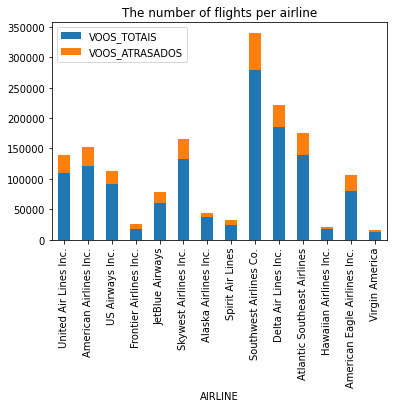

In [21]:
#Análise da relação entre os voos totais de cada empresa e os voos atrasados

companhias[['AIRLINE','VOOS_TOTAIS','VOOS_ATRASADOS']].plot.bar(x='AIRLINE', stacked=True, title='The number of flights per airline')

No gráfico abaixo está evidenciado o percentual de atraso por companhia aérea

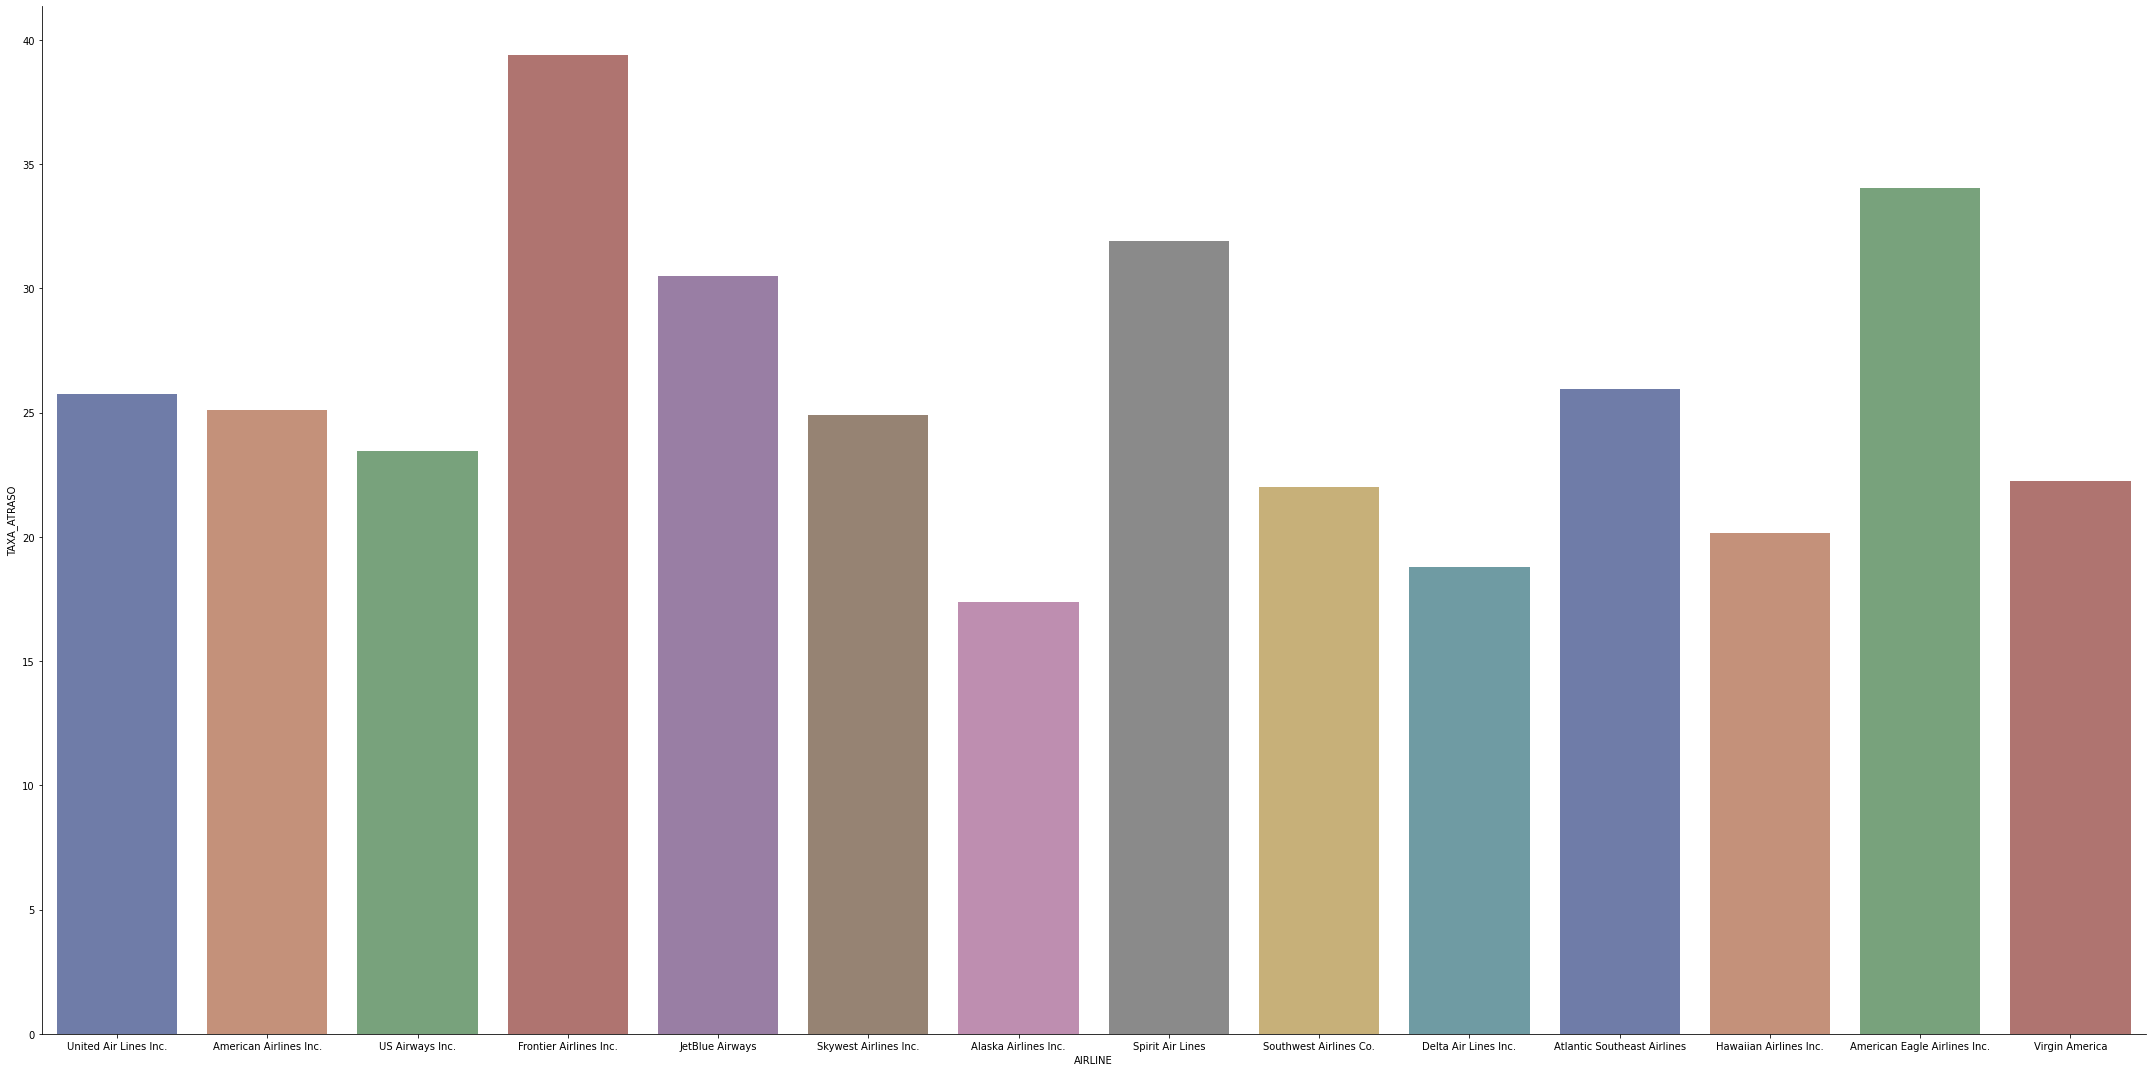

In [22]:
sns.catplot(
    data=companhias, kind="bar",
     x= "AIRLINE", y="TAXA_ATRASO",
    ci="sd", palette="dark", alpha=.6, height=15, aspect=2
)


##Matriz de Correlação 

é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre **-1** (associação negativa perfeita) e **1** (associação positiva perfeita).

In [23]:
voos.set_index('AIRLINE').head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO
AIRLINE,,,,,,,,,,,,,,,,,,,,,
AS,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AA,2015,1,1,4,2336,N3KUAA,LAX,PBI,10,2.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
US,2015,1,1,4,840,N171US,SFO,CLT,20,18.0,...,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AA,2015,1,1,4,258,N3HYAA,LAX,MIA,20,15.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AS,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [24]:
voos = pd.merge(voos, companhias.drop(['AIRLINE'], axis=1), left_on='AIRLINE', right_index=True)

In [25]:
voos.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,-0.131212,-0.041093,-0.013127,0.003527,0.002690,0.005068,-0.019072,0.001181,...,0.002915,-0.003388,0.000202,0.011216,0.001141,0.001655,-0.008504,0.009226,0.006471,-0.013164
DAY,NaN,-0.131212,1.000000,-0.000449,0.005420,-0.013707,-0.019175,-0.067901,-0.014259,-0.018461,...,-0.022603,-0.010504,0.000447,-0.002418,-0.030766,-0.012620,-0.078865,0.003154,0.002415,-0.003839
DAY_OF_WEEK,NaN,-0.041093,-0.000449,1.000000,0.014465,0.013106,0.007720,-0.001225,-0.013022,0.005969,...,-0.030580,-0.000831,0.007264,0.008942,-0.011388,-0.012507,0.002405,-0.012640,-0.012587,0.004885
FLIGHT_NUMBER,NaN,-0.013127,0.005420,0.014465,1.000000,-0.003554,0.001633,0.003980,0.040527,0.007904,...,0.034576,-0.017264,-0.006378,0.001908,0.047503,-0.005588,0.017064,0.061428,0.155825,0.165280
SCHEDULED_DEPARTURE,NaN,0.003527,-0.013707,0.013106,-0.003554,1.000000,0.970067,0.094769,-0.063900,0.945956,...,0.001367,-0.103663,0.002473,-0.074811,0.144483,-0.044877,0.111568,0.000757,0.000107,0.005127
DEPARTURE_TIME,NaN,0.002690,-0.019175,0.007720,0.001633,0.970067,1.000000,0.171626,-0.052958,0.973615,...,0.007776,-0.087279,0.000924,-0.003695,0.209174,-0.026858,0.166686,0.005346,0.006268,0.008409
DEPARTURE_DELAY,NaN,0.005068,-0.067901,-0.001225,0.003980,0.094769,0.171626,1.000000,0.086487,0.164528,...,0.040061,0.075515,0.014619,0.614708,0.557233,0.288156,0.532236,-0.018277,-0.008003,0.068476
TAXI_OUT,NaN,-0.019072,-0.014259,-0.013022,0.040527,-0.063900,-0.052958,0.086487,1.000000,-0.025256,...,0.006295,0.407918,-0.009583,-0.058403,-0.126365,0.124110,0.292116,-0.155363,-0.159132,0.054488
WHEELS_OFF,NaN,0.001181,-0.018461,0.005969,0.007904,0.945956,0.973615,0.164528,-0.025256,1.000000,...,0.005686,-0.071470,-0.003539,-0.012364,0.186626,-0.029220,0.170988,0.006712,0.007672,0.005788


In [26]:
voos.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
count,1310399.0,1.310399e+06,1.310399e+06,1.310399e+06,1.310399e+06,1.310399e+06,1.268399e+06,1.268399e+06,1.267607e+06,1.267607e+06,...,1.310398e+06,270938.000000,270938.000000,270938.000000,270938.000000,270938.000000,1.310399e+06,1.310399e+06,1.310399e+06,1.310399e+06
mean,2015.0,1.955183e+00,1.461432e+01,3.923149e+00,2.246327e+03,1.324919e+03,1.334887e+03,1.056802e+01,1.645285e+01,1.358192e+03,...,3.289611e-02,13.536850,0.062933,18.260167,22.767386,3.294148,2.435701e-01,1.507551e+05,3.493902e+04,2.435701e+01
std,0.0,8.188193e-01,8.230938e+00,1.983833e+00,1.794519e+03,4.739417e+02,4.856963e+02,3.827263e+01,9.742952e+00,4.861455e+02,...,1.783647e-01,25.922757,1.979790,46.368691,42.041786,22.897010,4.292363e-01,7.876337e+04,1.596339e+04,4.408040e+00
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.290800e+04,2.870000e+03,1.738391e+01
25%,2015.0,1.000000e+00,8.000000e+00,2.000000e+00,7.520000e+02,9.200000e+02,9.270000e+02,-5.000000e+00,1.100000e+01,9.420000e+02,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.181800e+04,2.718700e+04,2.200403e+01
50%,2015.0,2.000000e+00,1.500000e+01,4.000000e+00,1.717000e+03,1.320000e+03,1.330000e+03,-1.000000e+00,1.400000e+01,1.343000e+03,...,0.000000e+00,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000e+00,1.329000e+05,3.310400e+04,2.490895e+01
75%,2015.0,3.000000e+00,2.200000e+01,6.000000e+00,3.470000e+03,1.724000e+03,1.733000e+03,1.000000e+01,1.900000e+01,1.747000e+03,...,0.000000e+00,18.000000,0.000000,19.000000,29.000000,0.000000,0.000000e+00,1.858720e+05,3.613100e+04,2.573801e+01
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,1.000000e+00,1101.000000,241.000000,1971.000000,1313.000000,1152.000000,1.000000e+00,2.790670e+05,6.140600e+04,3.938002e+01


In [27]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'RESULTADO_ATRASO',
       'VOOS_TOTAIS', 'VOOS_ATRASADOS', 'TAXA_ATRASO'],
      dtype='object')

##Gráficos de Dispersão 

<Figure size 864x432 with 0 Axes>

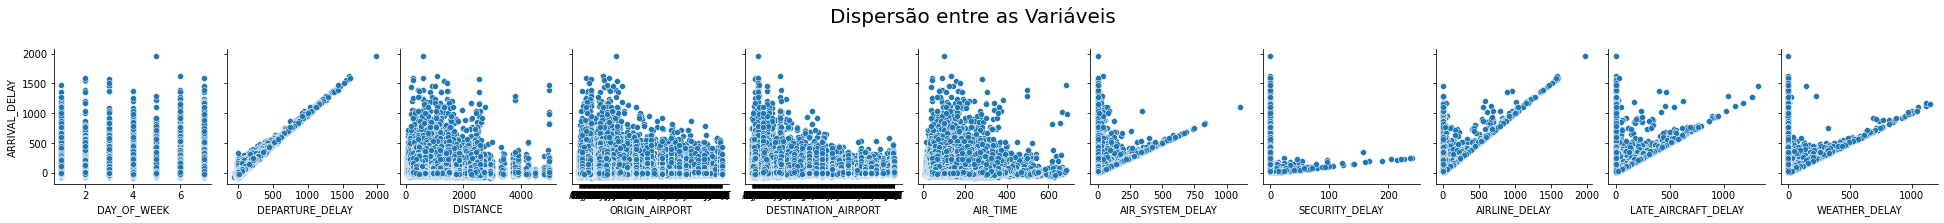

In [28]:
plt.figure(figsize = (12,6))
ax = sns.pairplot(voos, y_vars='ARRIVAL_DELAY',
                  x_vars=['DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DISTANCE', 'ORIGIN_AIRPORT',
                          'DESTINATION_AIRPORT', 'AIR_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                          'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]) #kind = reg - traça uma reta de regressao entre as duas variaveis
                  
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.20) 
ax

## Variavel Independente

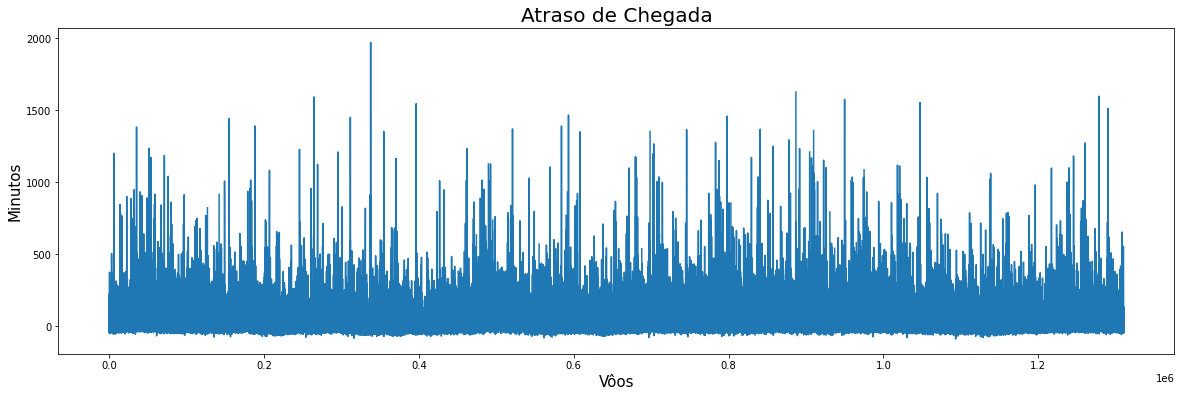

In [29]:
#Plotando a variavel independente

fig, ax = plt.subplots(figsize = (20, 6)) #gera uma tupla com dois objetos

ax.set_title('Atraso de Chegada', fontsize = 20)
ax.set_ylabel('Minutos', fontsize = 15)
ax.set_xlabel('Vôos', fontsize = 15)
ax = voos['ARRIVAL_DELAY'].plot()




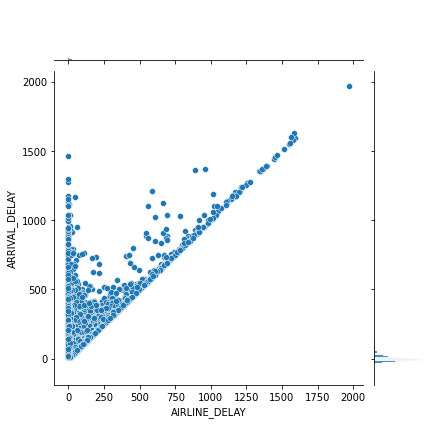

In [30]:
sns.jointplot(data = voos, x="AIRLINE_DELAY", y="ARRIVAL_DELAY")

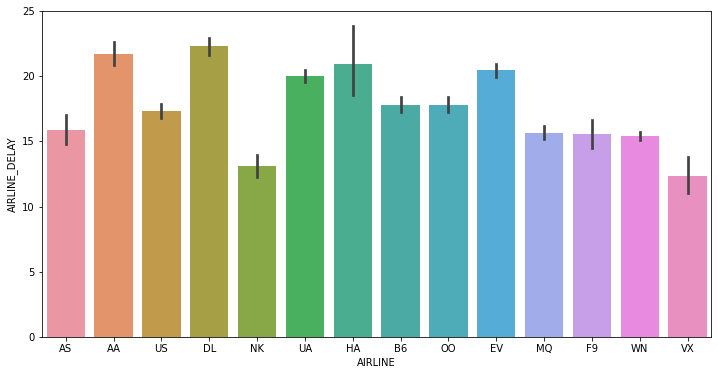

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(data = voos, y = 'AIRLINE_DELAY', x = 'AIRLINE', orient = 'v')



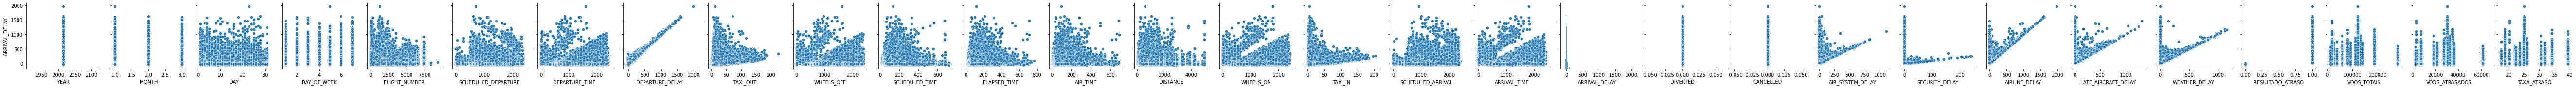

In [32]:
sns.pairplot(voos, y_vars='ARRIVAL_DELAY')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb12356f550>,
      dtype=object)

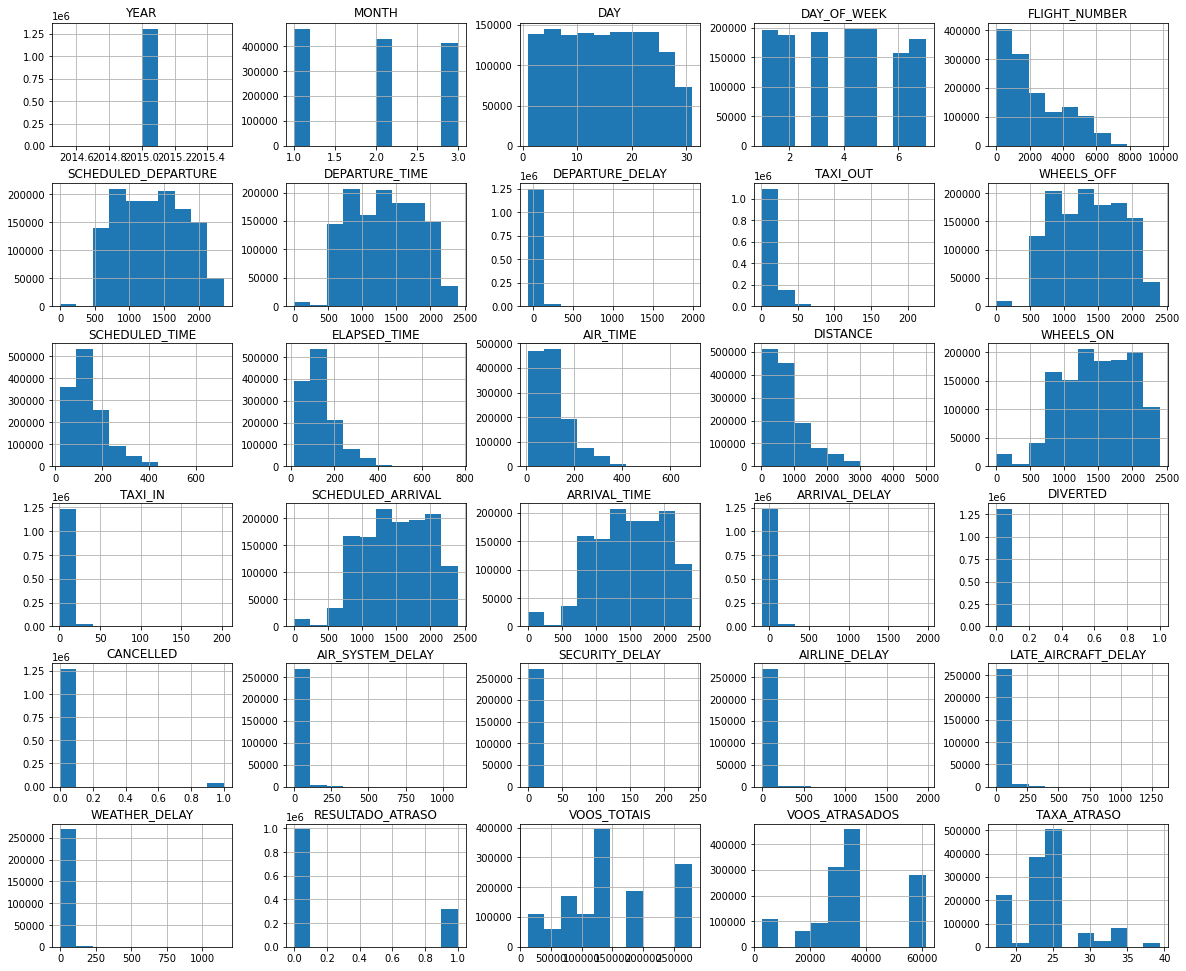

In [33]:
voos.hist(figsize = (20,17))

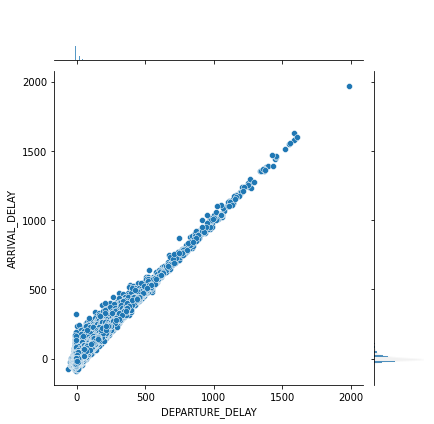

In [34]:
#Relação entre o horário de partida e atraso de chegada
x = 'DEPARTURE_DELAY'
y = 'ARRIVAL_DELAY'
sns.jointplot(data=voos, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY")

In [35]:
companhias = pd.read_csv('airlines.csv')

In [36]:
companhias.head(5)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


##Treinando Modelo Linear

In [59]:
#Importando train_test_split

from sklearn.model_selection import train_test_split

In [58]:
voos_modelo = voos[["AIRLINE",'ARRIVAL_DELAY', "DISTANCE", 'RESULTADO_ATRASO', 'TAXA_ATRASO', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]].dropna()

In [60]:
#Pegando uma amostra de 30% do dataset
voos_modelo_sample = voos_modelo[["AIRLINE",'ARRIVAL_DELAY' , "DISTANCE",'RESULTADO_ATRASO', 'TAXA_ATRASO', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]].sample(frac = 0.3, random_state=1)

In [61]:
one_hot = pd.get_dummies(voos_modelo_sample, columns=['AIRLINE', "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])

In [62]:
one_hot.head()

,ARRIVAL_DELAY,DISTANCE,RESULTADO_ATRASO,TAXA_ATRASO,DEPARTURE_DELAY,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
232793,-4.0,643,0,31.913676,-7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797689,-2.0,505,0,25.934752,-5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
460434,-9.0,694,0,24.908954,-8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064954,2.0,967,0,25.738007,17.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
968017,9.0,579,0,25.934752,-3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
one_hot.shape

(379286, 655)

In [64]:
#criando uma Series pra armazenar a variavel dependente (y)
y = voos_modelo_sample['ARRIVAL_DELAY']

In [65]:
#Criando um dataFrame para armazenar as variaveis explicativas (x)
# X = voos_modelo[['AIRLINE', "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT",'ARRIVAL_DELAY', 'RESULTADO_ATRASO', 'TAXA_ATRASO', "DISTANCE", 'DEPARTURE_DELAY']]

X = one_hot.drop('ARRIVAL_DELAY', axis=1)

In [66]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
modelo = LinearRegression()

In [69]:
#Método Fit para estimar o modelo linear utilizando os dados de treino
modelo.fit(X_train, y_train)

LinearRegression()

In [70]:
#Coeficiente de Determinação (R²): Medida de quanto a linha de regressão se ajusta aos dados

print("R² = {}".format(modelo.score(X_train, y_train)))

R² = 0.9128735218280858


In [71]:
y_predict = modelo.predict(x_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
y_test

1015822    -5.0
299961     -6.0
218624     -2.0
856718     -6.0
841743      3.0
           ... 
334416      4.0
282595    -13.0
790028      1.0
769591    -25.0
680777    -13.0
Name: ARRIVAL_DELAY, Length: 113786, dtype: float64

In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
mean_absolute_error(y_test, y_predict) * 100

856.4605516129348

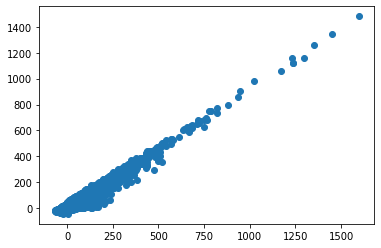

In [76]:
plt.scatter(y_test,y_predict)

In [77]:
y_train

1062561   -19.0
795384    -10.0
1198025    41.0
128381     -3.0
612249      3.0
           ... 
29604       8.0
26692     -23.0
569408     20.0
614598      4.0
1244437   -19.0
Name: ARRIVAL_DELAY, Length: 265500, dtype: float64

In [78]:
y_predict

array([-13.74080982, -12.60653103,  -7.03392586, ...,  -9.44078728,
       -10.67247951, -13.72990241])